### <center> Outlier Treatment Methods

### Z-score method

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./CarPricesData.csv")

In [3]:
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


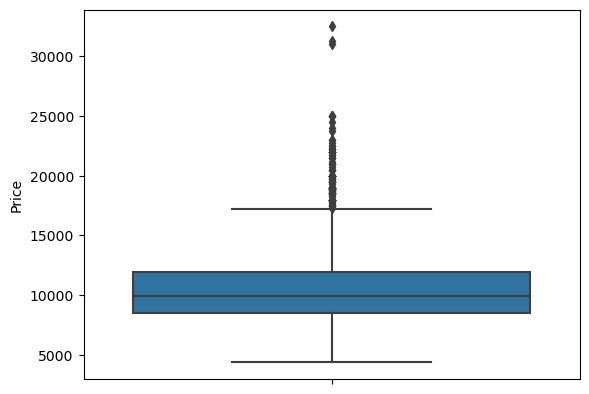

In [4]:
sns.boxplot(data=data,y='Price')
plt.show()

In [5]:
data['Z_score'] = stats.zscore(data.Price)

In [6]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Z_score
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715


In [7]:
cleaned_data = data[data['Z_score']<3]
cleaned_data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Z_score
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0,-0.891089
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0,0.031491
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0,-0.615281
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0,-0.960042


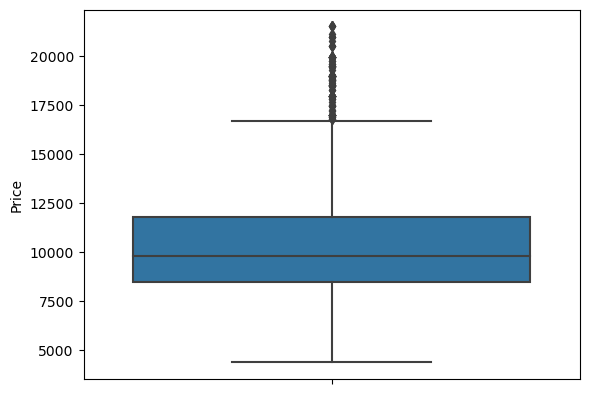

In [8]:
sns.boxplot(data=cleaned_data,y='Price')
plt.show()

### Percentile Capping method

The percentile capping method removes outliers that fall above or below a certain percentile threshold. For example, we can remove data points that fall above the 95th percentile or below the 5th percentile. 

In [9]:
lower = np.nanpercentile(data.Price,5)
upper = np.nanpercentile(data.Price,95)

In [10]:
cleaned_data = np.clip(data.Price,lower,upper)
cleaned_data

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [11]:
data1 = data[data['Price'] == cleaned_data]

In [12]:
data.shape

(1436, 11)

In [13]:
data1.shape

(1308, 11)

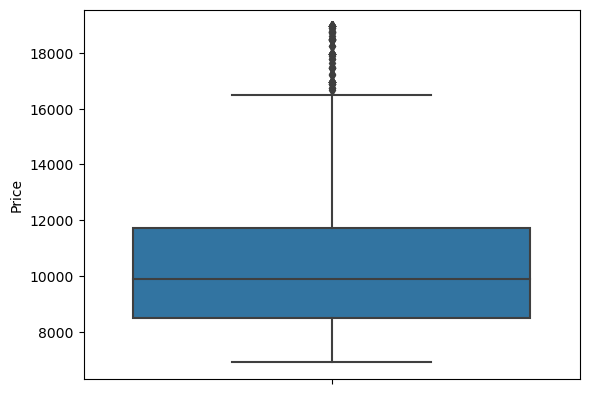

In [14]:
sns.boxplot(data=data1,y='Price')
plt.show()

### Winsorization

In [15]:
import scipy.stats as stasts

In [16]:
winsorized_price = stasts.mstats.winsorize(data.Price,limits=[0.05,0.05])
winsorized_price

masked_array(data=[13500, 13750, 13950, ...,  8500,  7250,  6950],
             mask=False,
       fill_value=999999,
            dtype=int64)

In [17]:
data['winsorized_price'] = winsorized_price

In [18]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Z_score,winsorized_price
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0.763763,13500
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0.832715,13750
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0.887877,13950
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,1.163685,14950
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0.832715,13750
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0,-0.891089,7500
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0,0.031491,10845
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0,-0.615281,8500
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0,-0.960042,7250


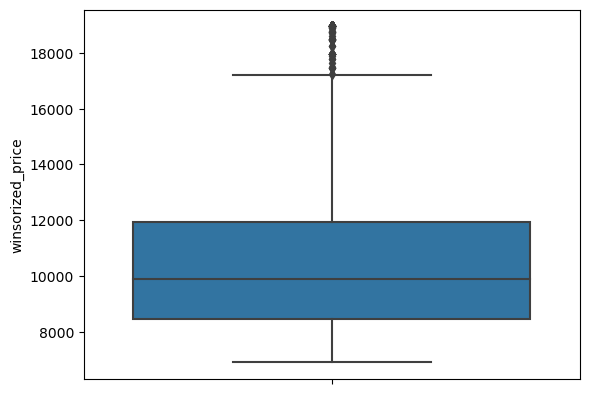

In [19]:
sns.boxplot(y = data.winsorized_price)
plt.show()

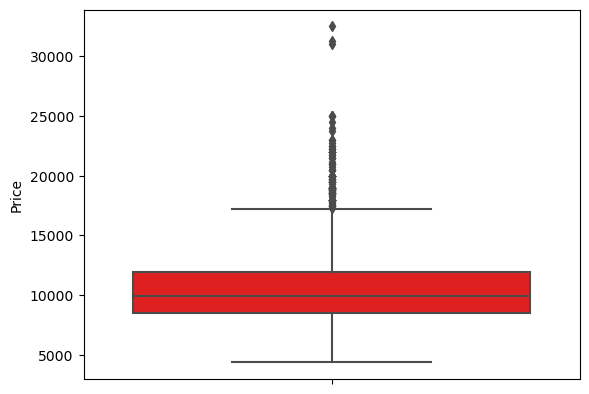

In [20]:
sns.boxplot(y=data.Price,color='red')
plt.show()

# I)

Z_score method

In [21]:
Data = pd.read_csv("./Car_sales.csv")
Data.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


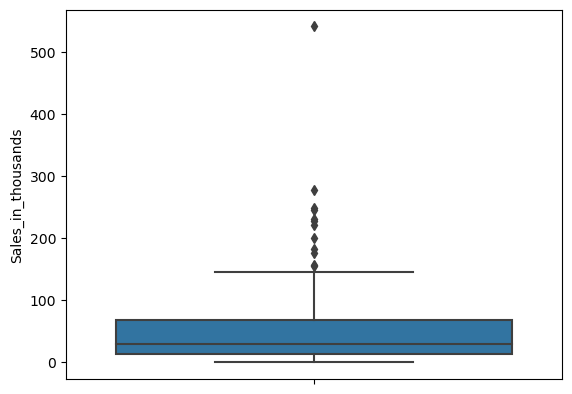

In [22]:
sns.boxplot(data=Data,y='Sales_in_thousands')
plt.show()

In [23]:
Data['z_score'] = stats.zscore(Data.Sales_in_thousands)

In [24]:
Data.head(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,z_score
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,-0.532042
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,-0.200761
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,-0.573406
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,-0.654896
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,-0.480754
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105,-0.504599
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858,-0.761189
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,-0.490339
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069,-0.645414
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724,-0.523076


In [25]:
Cleaned_data = Data[Data['z_score']<3]
Cleaned_data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,z_score
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,-0.532042
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,-0.200761
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,-0.573406
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,-0.654896
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,-0.480754


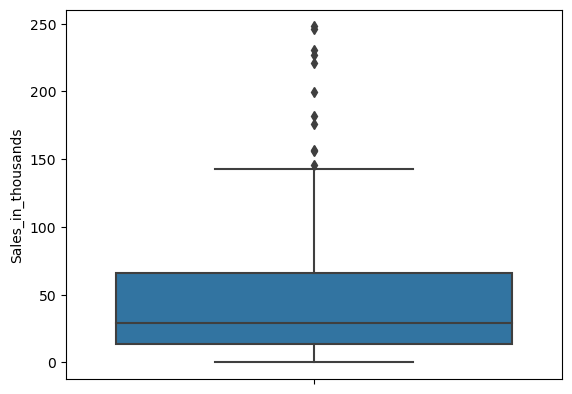

In [26]:
sns.boxplot(data=Cleaned_data,y='Sales_in_thousands')
plt.show()

Percentile Capping Method

In [27]:
Lower = np.nanpercentile(Data.Sales_in_thousands,5)
Upper = np.nanpercentile(Data.Sales_in_thousands,95)

In [28]:
Cleaned_data = np.clip(Data.Sales_in_thousands,Lower,Upper)
Cleaned_data

0      16.919
1      39.384
2      14.114
3       8.588
4      20.397
        ...  
152     3.545
153    15.245
154    17.531
155     3.493
156    18.969
Name: Sales_in_thousands, Length: 157, dtype: float64

In [29]:
Data1 = Data[Data['Sales_in_thousands'] == Cleaned_data]
Data1

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,z_score
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,-0.532042
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,-0.200761
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,-0.573406
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,-0.654896
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,-0.480754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,-0.729263
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,-0.556728
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,-0.523017
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,-0.730030


In [30]:
Data.shape

(157, 17)

In [31]:
Data1.shape

(141, 17)

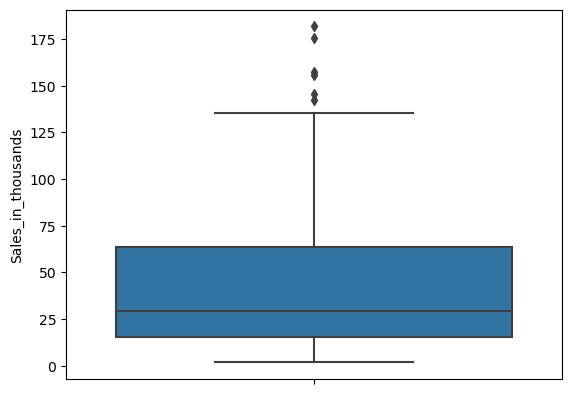

In [32]:
sns.boxplot(data=Data1,y='Sales_in_thousands')
plt.show()

Winsorization

In [33]:
import scipy.stats as stasts

In [34]:
Winsorized_Sales_in_thousands = stasts.mstats.winsorize(Data.Sales_in_thousands,limits=[0.05,0.05])
Winsorized_Sales_in_thousands

masked_array(data=[ 16.919,  39.384,  14.114,   8.588,  20.397,  18.78 ,
                     1.866,  19.747,   9.231,  17.527,  91.561,  39.35 ,
                    27.851,  83.257,  63.729,  15.943,   6.536,  11.185,
                    14.785, 145.519, 135.126,  24.629,  42.593,  26.402,
                    17.947,  32.299,  21.855, 107.995,   7.854,  32.775,
                    31.148,  32.306,  13.462,  53.48 ,  30.696,  76.034,
                     4.734,  71.186,  88.028,   1.866, 199.685,  16.767,
                    31.038, 111.313, 101.323, 181.749,  70.227, 113.369,
                    35.068, 199.685, 175.67 ,  63.403, 199.685, 155.787,
                   125.338, 199.685, 199.685, 199.685, 199.685,  73.203,
                    12.855,  76.029,  41.184,  66.692,  29.45 ,  23.713,
                    15.467,  55.557,  80.556, 157.04 ,  24.072,  12.698,
                     3.334,   6.375,   9.126,  51.238,  13.798,  48.911,
                    22.925,  26.232,  42.541,  55.6

In [35]:
Data['Winsorized_Sales_in_thousands'] = Winsorized_Sales_in_thousands
Data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,z_score,Winsorized_Sales_in_thousands
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,-0.532042,16.919
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,-0.200761,39.384
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,-0.573406,14.114
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,-0.654896,8.588
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,-0.480754,20.397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,-0.729263,3.545
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,-0.556728,15.245
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,-0.523017,17.531
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,-0.730030,3.493


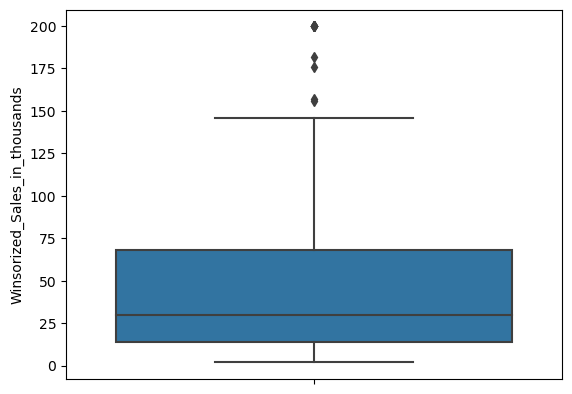

In [36]:
sns.boxplot(y=Data.Winsorized_Sales_in_thousands)
plt.show()

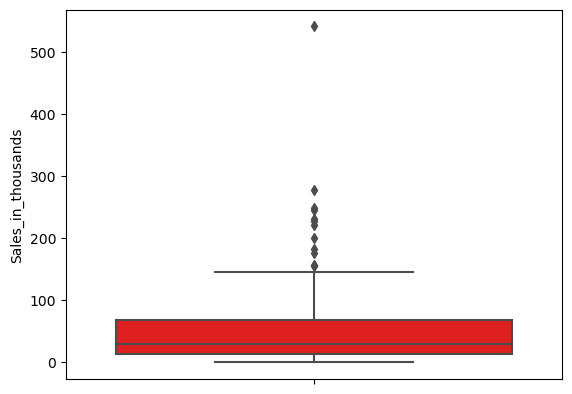

In [37]:
sns.boxplot(y=Data.Sales_in_thousands,color='red')
plt.show()

# II)

Z-score method

In [38]:
df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


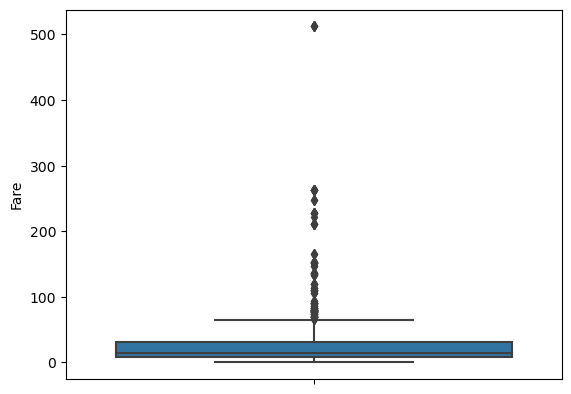

In [39]:
sns.boxplot(data=df,y='Fare')
plt.show()

In [40]:
df['Z_score'] = stats.zscore(df.Fare)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486337


In [41]:
cleaned_data = df[df['Z_score']<3]
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486337


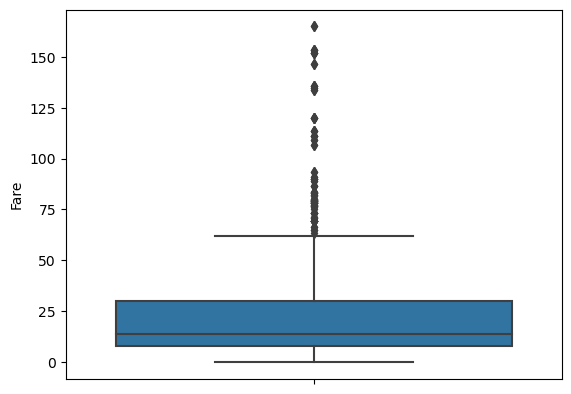

In [42]:
sns.boxplot(data=cleaned_data,y='Fare')
plt.show()

Percentile Capping Method

In [43]:
lower = np.nanpercentile(df.Fare,5)
upper = np.nanpercentile(df.Fare,95)

In [44]:
cleaned_data = np.clip(df.Fare,lower,upper)
cleaned_data

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [45]:
df1 = df[df['Fare']==cleaned_data]

In [46]:
df.shape

(891, 13)

In [47]:
df1.shape

(803, 13)

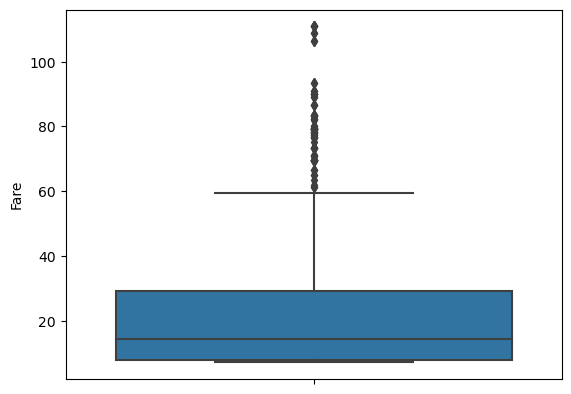

In [48]:
sns.boxplot(data= df1,y='Fare')
plt.show()

Winsorization

In [49]:
import scipy.stats as stasts

In [50]:
winsorized_fare = stasts.mstats.winsorize(df.Fare,limits=[0.05,0.05])
winsorized_fare

masked_array(data=[  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,
                     8.4583,  51.8625,  21.075 ,  11.1333,  30.0708,
                    16.7   ,  26.55  ,   8.05  ,  31.275 ,   7.8542,
                    16.    ,  29.125 ,  13.    ,  18.    ,   7.225 ,
                    26.    ,  13.    ,   8.0292,  35.5   ,  21.075 ,
                    31.3875,   7.225 , 113.275 ,   7.8792,   7.8958,
                    27.7208, 113.275 ,   7.75  ,  10.5   ,  82.1708,
                    52.    ,   7.2292,   8.05  ,  18.    ,  11.2417,
                     9.475 ,  21.    ,   7.8958,  41.5792,   7.8792,
                     8.05  ,  15.5   ,   7.75  ,  21.6792,  17.8   ,
                    39.6875,   7.8   ,  76.7292,  26.    ,  61.9792,
                    35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
                     7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,
                    15.2458,  10.5   ,   8.1583,   7.925 ,   8.6625,
                    10.5   ,  46.9

In [51]:
df['winsorized_fare'] = winsorized_fare

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Z_score,winsorized_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502445,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786845,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420730,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486337,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-0.386671,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-0.044381,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-0.176263,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-0.044381,30.0000


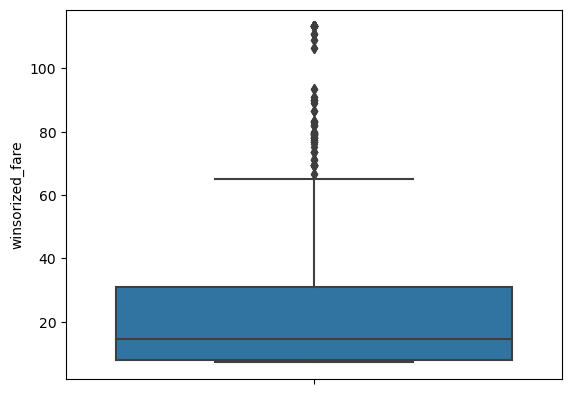

In [53]:
sns.boxplot(y=df.winsorized_fare)
plt.show()

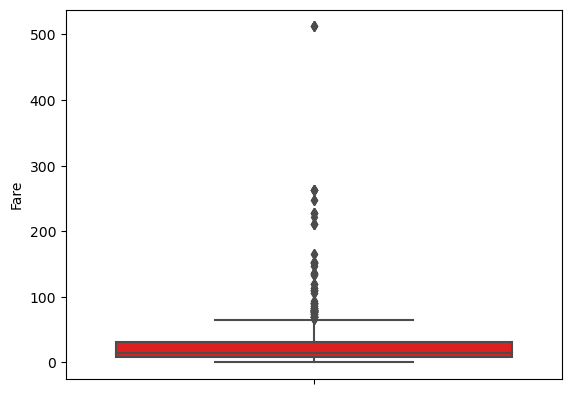

In [54]:
sns.boxplot(y=df.Fare,color='red')
plt.show()

# III)

Z_score method

In [55]:
data2 = pd.read_csv("./Data Science Jobs Salaries.csv")
data2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


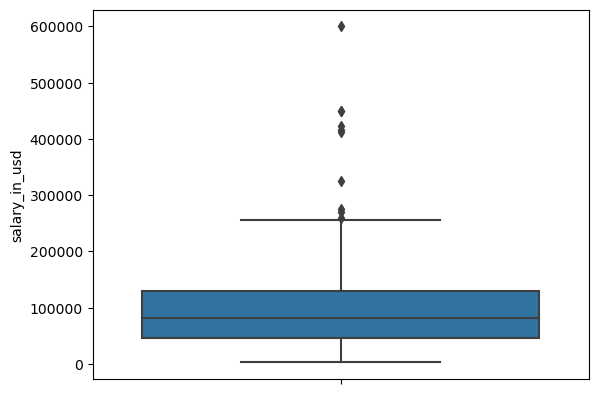

In [56]:
sns.boxplot(data=data2,y='salary_in_usd')
plt.show()

In [57]:
data2['z_score'] = stats.zscore(data2.salary_in_usd)
data2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_score
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L,-0.423556
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L,-0.375127
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M,-0.177398
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L,1.552670
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S,0.299862


In [58]:
cleaned_data = data2[data2['z_score']<3]
cleaned_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_score
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L,-0.423556
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L,-0.375127
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M,-0.177398
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L,1.552670
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S,0.299862


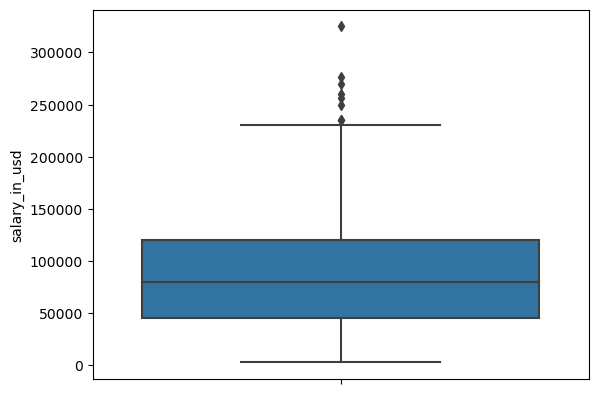

In [59]:
sns.boxplot(data=cleaned_data,y='salary_in_usd')
plt.show()

Percentile Capping Method

In [60]:
lower = np.nanpercentile(data2.salary_in_usd,5)
upper = np.nanpercentile(data2.salary_in_usd,95)

In [61]:
cleaned_data = np.clip(data2.salary_in_usd,lower,upper)
cleaned_data

0       64369
1       68428
2       85000
3      230000
4      125000
        ...  
240    235000
241    151000
242    105000
243    100000
244     94917
Name: salary_in_usd, Length: 245, dtype: int64

In [62]:
data2A = data2[data2['salary_in_usd'] == cleaned_data]

In [63]:
data2.shape

(245, 12)

In [64]:
data2A.shape

(221, 12)

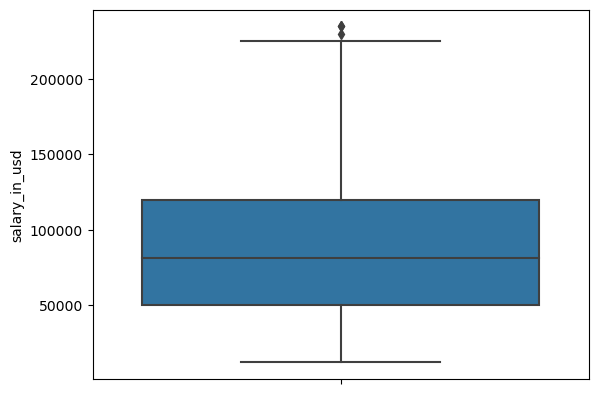

In [65]:
sns.boxplot(data=data2A,y='salary_in_usd')
plt.show()

Winsorization

In [66]:
import scipy.stats as stasts

In [67]:
winsorized_salary_in_usd = stasts.mstats.winsorize(data2.salary_in_usd,limits=[0.05,0.05])
winsorized_salary_in_usd

masked_array(data=[ 64369,  68428,  85000, 230000, 125000, 120000, 235000,
                    46759,  74130, 127543, 144000,  13400,  75966, 150000,
                   103000, 153000,  90000,  90000,  60000,  50000,  12000,
                    12000, 235000,  54376,  47681, 154963,  28801, 110000,
                    83000, 235000,  59601,  80000,  12000, 138000, 140000,
                    79866, 170000,  80000,  45760, 100000,  53641, 235000,
                   150000,  79833, 225000,  77481,  50180,  89402, 103750,
                   114125,  95362,  30509, 150000, 115000, 187917,  51814,
                   106000, 112872,  36732, 150000,  15966,  96554,  70000,
                   235000,  76958,  89514,  29831, 235000, 188000, 160000,
                   105000, 200000, 174000,  93000,  28475,  61270,  90000,
                    70139,  12000,  33511, 170000,  96833,  13105,  36952,
                    72625,  91000,  99956, 165000,  80000, 103954,  21695,
                    42000

In [68]:
data2['winsorized_salary_in_usd'] = winsorized_salary_in_usd

In [69]:
data2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_score,winsorized_salary_in_usd
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L,-0.423556,64369
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L,-0.375127,68428
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M,-0.177398,85000
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L,1.552670,230000
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S,0.299862,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,3.724203,235000
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,0.610081,151000
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,0.061232,105000
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,0.001575,100000


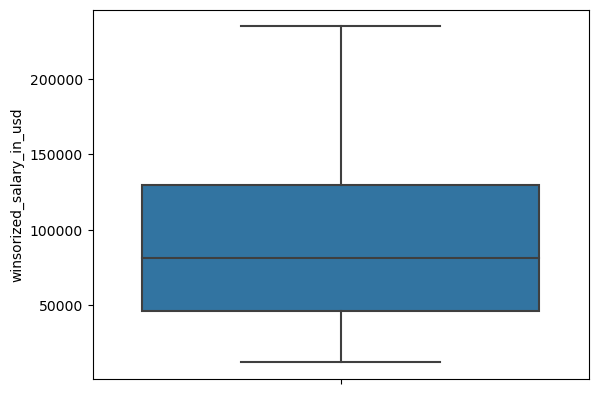

In [70]:
sns.boxplot(y=data2.winsorized_salary_in_usd)
plt.show()

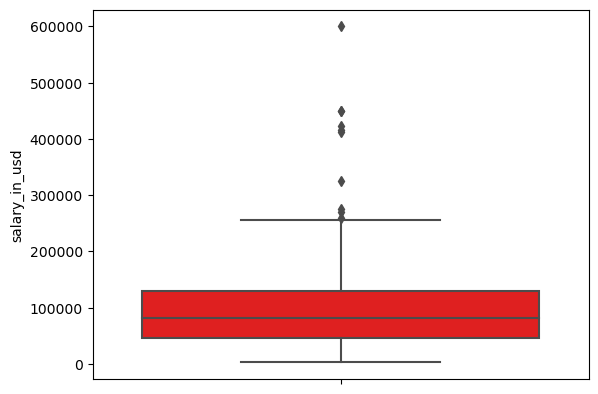

In [71]:
sns.boxplot(y=data2.salary_in_usd,color='red')
plt.show()

# IV)

Z_score method

In [82]:
Data2 = pd.read_csv("./insurance.csv")
Data2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


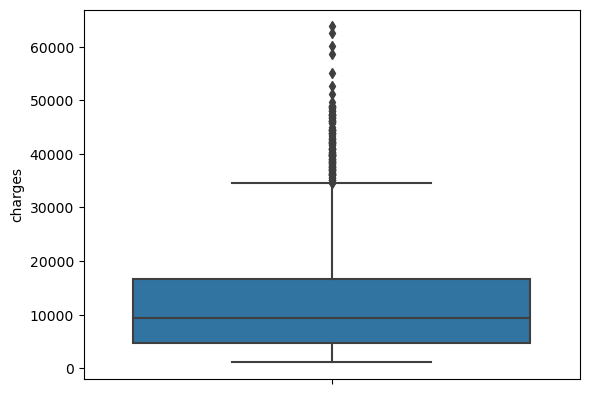

In [83]:
sns.boxplot(data=Data2,y='charges')
plt.show()

In [84]:
Data2['z_score']=stats.zscore(Data2.charges)
Data2

,age,sex,bmi,children,smoker,region,charges,z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,-0.220551
1334,18,female,31.920,0,no,northeast,2205.98080,-0.914002
1335,18,female,36.850,0,no,southeast,1629.83350,-0.961596
1336,21,female,25.800,0,no,southwest,2007.94500,-0.930362


In [85]:
cleaned_data = Data2[Data2['z_score']<3]
cleaned_data.head()

,age,sex,bmi,children,smoker,region,charges,z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [88]:
sns.boxplot(data=cleaned_data,y='charges')
plt.show()

"sns.boxplot(data=cleaned_data,y='charges')\nplt.show()"

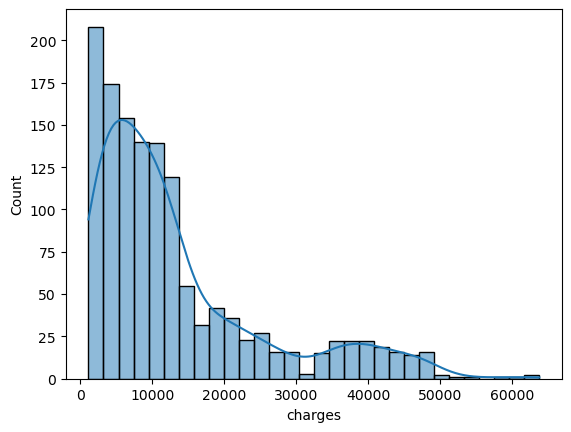

In [87]:
sns.histplot(x=Data2.charges, kde=True)
plt.show()